In [ ]:
# comparision of bubble and merge sorts
# both algorithms are sequential

In [6]:
# imports

import random
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [7]:
# dataset sizes

Ns = [1000 * i for i in range(1, 31)] 
print(f"Dataset sizes: {Ns[:5]} ... {Ns[-1]}")


Dataset sizes: [1000, 2000, 3000, 4000, 5000] ... 30000


In [8]:
# -------- bubble sort --------
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


In [9]:
# -------- sequential merge sort --------
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


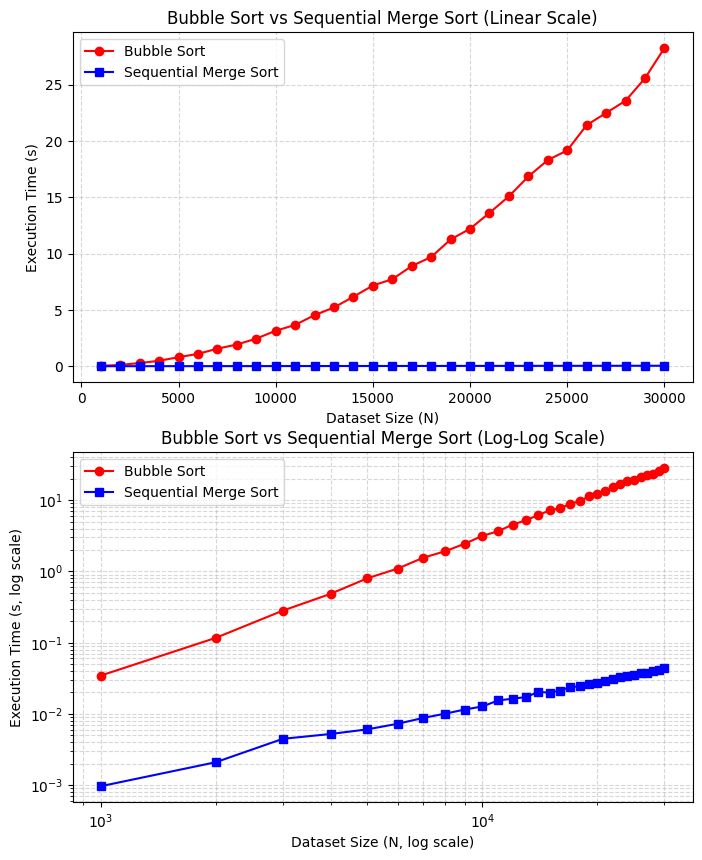

In [11]:
# computation and real-time plotting

times_seq = []
times_par = []

plt.ion()  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))  # wwo subplots for linear and log-log scale axes

for N in Ns:
    # generate dataset based on size in Ns list
    data = [random.randint(1, 1_000_000) for _ in range(N)]
    
    # bubble sort
    start = time.time()
    bubble_sort(data.copy())
    end = time.time()
    times_seq.append(end - start)
    
    # sequential merge sort
    start = time.time()
    merge_sort(data.copy())
    end = time.time()
    times_par.append(end - start)
    
    # plear previous plots
    ax1.clear()
    ax2.clear()
    
    # --- linear Scale Plot ---
    ax1.plot(Ns[:len(times_seq)], times_seq, marker='o', label="Bubble Sort", color="red")
    ax1.plot(Ns[:len(times_par)], times_par, marker='s', label="Sequential Merge Sort", color="blue")
    ax1.set_xlabel("Dataset Size (N)")
    ax1.set_ylabel("Execution Time (s)")
    ax1.set_title("Bubble Sort vs Sequential Merge Sort (Linear Scale)")
    ax1.legend()
    ax1.grid(True, ls="--", alpha=0.5)
    
    # --- log-log Scale Plot ---
    ax2.plot(Ns[:len(times_seq)], times_seq, marker='o', label="Bubble Sort", color="red")
    ax2.plot(Ns[:len(times_par)], times_par, marker='s', label="Sequential Merge Sort", color="blue")
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Dataset Size (N, log scale)")
    ax2.set_ylabel("Execution Time (s, log scale)")
    ax2.set_title("Bubble Sort vs Sequential Merge Sort (Log-Log Scale)")
    ax2.legend()
    ax2.grid(True, which="both", ls="--", alpha=0.5)
    
    # display updated plots
    plt.savefig("plots/task1_bubble_merge_comparison.png", dpi=300, bbox_inches='tight')
    display(fig)
    clear_output(wait=True)

plt.ioff()
plt.show()
